<h1><center><font color=blue>**Leading the March to Madness**</font></center></h1>
<h3><center>General Assembly Data Science Immersive Capstone Project</center></h3> 
<h4><center>Data and Description at https://www.kaggle.com/c/mens-machine-learning-competition-2018</center></h4>

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn import preprocessing, metrics, svm, ensemble
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix

In [2]:
df_predictions_tourney = pd.read_csv('./data/features.csv', index_col=0)
df_tourney_final = pd.read_csv('./data/df_tourney_final.csv', index_col=0)
df_sample_sub = pd.read_csv('./data/SampleSubmissionStage2.csv')

In [3]:
df_predictions_tourney.head()

,Seed,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,...,Luck,AdjEM_SOS,OppO_SOS,OppD_SOS,AdjEM_NCSOS,Season_ELO,result,Season,WTeamID,LTeamID
0,0,-18.0,-0.065855,0.052546,-0.023263,0.028533,-0.055467,0.012589,13.613617,19.954684,...,0.001,16.51,12.8,-3.7,13.23,131.501230,1,2005,1324,1105
1,13,127.0,-0.031576,-0.073963,0.020017,-0.038345,0.071169,-0.021575,-18.781055,-8.788508,...,0.022,-14.34,-7.7,6.7,-6.81,-510.831761,0,2005,1329,1368
2,15,215.0,-0.193842,-0.052560,-0.029080,-0.057046,-0.068337,-0.049954,-9.535419,19.756223,...,-0.033,-9.65,-3.5,6.1,10.11,-536.664569,0,2005,1314,1324
3,-3,-55.0,-0.005031,-0.039170,-0.007003,0.045268,0.015982,-0.005968,-2.974829,-0.596986,...,0.104,-6.37,-3.4,2.9,2.08,-99.309868,0,2005,1301,1150
4,-1,9.0,-0.055364,-0.021140,-0.009435,-0.058021,-0.035476,-0.027740,-3.497655,2.884055,...,0.011,1.98,0.6,-1.3,5.98,-6.396041,0,2005,1280,1390


In [4]:
labels = df_predictions_tourney['result']
IDs = df_predictions_tourney.iloc[:, 25:]
features = df_predictions_tourney.iloc[:, 0:24]
features.head()

,Seed,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,...,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM_SOS,OppO_SOS,OppD_SOS,AdjEM_NCSOS,Season_ELO
0,0,-18.0,-0.065855,0.052546,-0.023263,0.028533,-0.055467,0.012589,13.613617,19.954684,...,11.29,17.6,6.4,-7.6,0.001,16.51,12.8,-3.7,13.23,131.501230
1,13,127.0,-0.031576,-0.073963,0.020017,-0.038345,0.071169,-0.021575,-18.781055,-8.788508,...,-21.82,-24.1,-2.3,-6.2,0.022,-14.34,-7.7,6.7,-6.81,-510.831761
2,15,215.0,-0.193842,-0.052560,-0.029080,-0.057046,-0.068337,-0.049954,-9.535419,19.756223,...,-33.97,-14.4,19.6,-7.9,-0.033,-9.65,-3.5,6.1,10.11,-536.664569
3,-3,-55.0,-0.005031,-0.039170,-0.007003,0.045268,0.015982,-0.005968,-2.974829,-0.596986,...,-6.78,-3.4,3.4,7.5,0.104,-6.37,-3.4,2.9,2.08,-99.309868
4,-1,9.0,-0.055364,-0.021140,-0.009435,-0.058021,-0.035476,-0.027740,-3.497655,2.884055,...,-4.62,-2.7,1.9,-1.0,0.011,1.98,0.6,-1.3,5.98,-6.396041


In [5]:
y = df_predictions_tourney['result'][df_predictions_tourney['Season'] <= 2018]
IDs_training = df_predictions_tourney.iloc[:1426, 25:]
X = df_predictions_tourney.iloc[:1426, 0:24]

In [6]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

### Support Vector Machine Model

In [9]:
%%time

svc =GridSearchCV(
    SVC(probability=True),
    {
        'C':np.logspace(-3, 2, 10),
        'gamma':np.logspace(-5, 2, 10),
        'kernel':['linear','rbf']
    }, scoring = 'neg_log_loss'
)

Wall time: 0 ns


In [10]:
%%time
svc.fit(X_train, y_train)

Wall time: 20min 46s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-03, 3.59381e-03, 1.29155e-02, 4.64159e-02, 1.66810e-01,
       5.99484e-01, 2.15443e+00, 7.74264e+00, 2.78256e+01, 1.00000e+02]), 'gamma': array([1.00000e-05, 5.99484e-05, 3.59381e-04, 2.15443e-03, 1.29155e-02,
       7.74264e-02, 4.64159e-01, 2.78256e+00, 1.66810e+01, 1.00000e+02]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [11]:
y_svc_pred = svc.predict(X_test)
train_acc = accuracy_score(y_true=y_train, y_pred=svc.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=svc.predict(X_test))

Best paramaters are  {'C': 100.0, 'gamma': 0.0021544346900318843, 'kernel': 'linear'}
Testing log loss score is 0.35%
Best log loss score is 0.40%
Training Accuracy is 84.01%
Test Accuracy is 85.10%
Confusion Matrix:
[[85 19]
 [12 92]]
Classification Report:
             precision    recall  f1-score   support

       Loss       0.88      0.82      0.85       104
        Win       0.83      0.88      0.86       104

avg / total       0.85      0.85      0.85       208



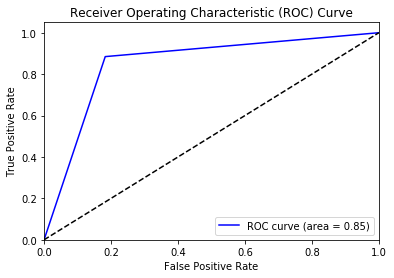

In [12]:
print('Best paramaters are ', svc.best_params_)
print('Testing log loss score is %.2f%%' % -svc.score(X_test, y_test))
print('Best log loss score is %.2f%%' % -svc.best_score_)
print('Training Accuracy is %.2f%%' % (100 * train_acc))
print('Test Accuracy is %.2f%%' % (100 * test_acc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, svc.predict(X_test)))
print('Classification Report:')
print(classification_report(y_test, 
                    y_svc_pred,
                    labels=svc.classes_,
                    target_names = ['Loss', 'Win']))

fpr, tpr, _ = roc_curve(y_test, svc.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()